## Importing all important Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
nba = pd.read_csv('nba_2013.csv')
pd.pandas.set_option('display.max_columns',None) 
print('shape of the dataset is :',nba.shape)
nba.head()

shape of the dataset is : (481, 31)


,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [4]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


## Checking Null Values


NULL values for NBA data:


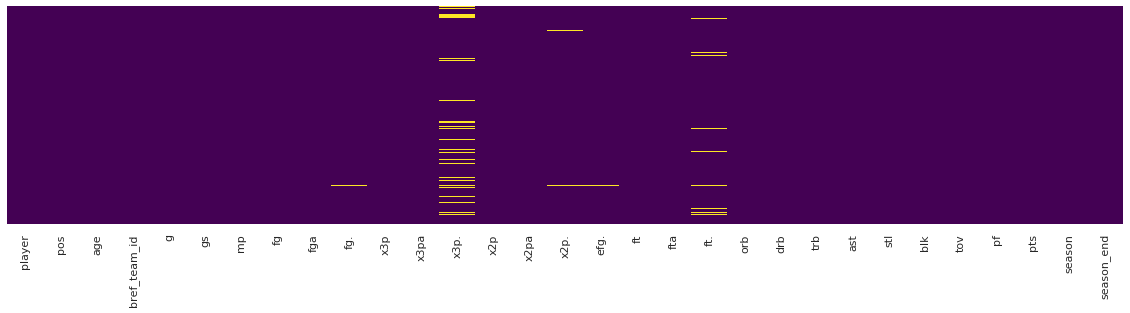

In [5]:
print("\nNULL values for NBA data:")
plt.figure(figsize=(20,4))
sns.heatmap(nba.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.show()

In [6]:
nba.fillna(nba.mean(),inplace=True)


NULL values for NBA data:


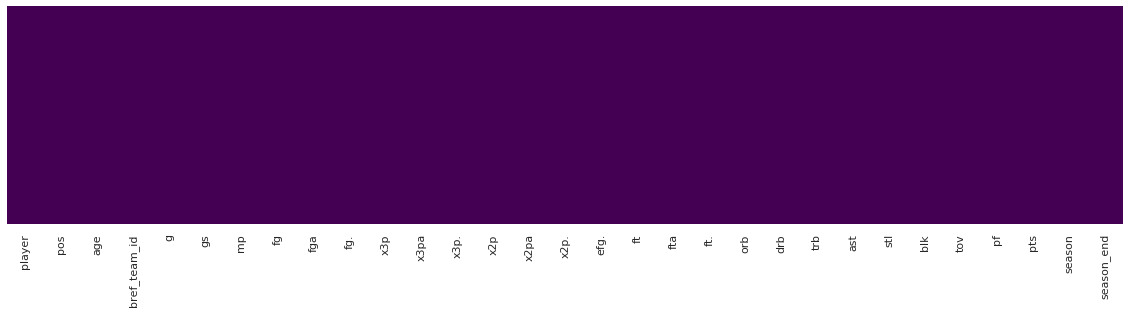

In [7]:
print("\nNULL values for NBA data:")
plt.figure(figsize=(20,4))
sns.heatmap(nba.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.show()

## Dividing the categorical & Numerical Data

In [8]:
nba_category=nba[['player','pos','bref_team_id','season_end']]

In [9]:
nba_numeric = nba[['age','g','gs','mp','fg','fga','fg.','x3p','x3pa','x3p.','x2p','x2pa','x2p.','efg.','ft','fta','ft.'
                  ,'orb','drb','trb','ast','stl','blk','tov','pf']]

## Scalarising the numeric data

In [10]:
scalar = StandardScaler()
nba_nscaled = scalar.fit_transform(nba_numeric)

In [11]:
pd.DataFrame(nba_nscaled,columns=nba_numeric.columns)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,-0.836776,0.385287,-0.863104,-0.435541,-0.739170,-0.769305,0.320886,-0.701011,-0.717354,-1.262752e-01,-0.620576,-0.640874,0.241474,0.012580,-0.542737,-0.515944,-0.398508,0.260962,-0.129597,-0.013130,-0.645891,-0.468543,0.061474,-0.668345,0.226751
1,-1.552101,1.096851,-0.188059,-0.045058,-0.581877,-0.649891,0.676707,-0.779747,-0.830465,-1.140124e-15,-0.409792,-0.440104,0.343762,0.224186,-0.117862,0.117140,-0.902879,1.389328,0.187214,0.566441,-0.531285,0.020702,1.066555,-0.013774,1.365358
2,0.116990,-0.010027,-0.458077,-0.308355,-0.290593,-0.405636,0.849534,-0.779747,-0.830465,-1.140124e-15,-0.069818,-0.133844,0.510063,0.395486,-0.146831,-0.012528,-0.532581,0.744547,0.283635,0.436537,-0.569487,-0.439764,0.385694,-0.524659,0.029955
3,0.355432,0.780600,1.600813,1.466669,1.579447,1.591828,0.229389,1.739801,1.431746,9.691197e-01,1.242482,1.349812,0.054096,0.415639,1.765106,1.642645,0.591080,-0.383819,0.462702,0.216700,1.034996,-0.123194,-0.684232,1.183611,0.423547
4,-0.359893,0.108567,0.149464,-0.319512,-0.331373,-0.476199,1.113858,-0.779747,-0.822924,-1.951934e+00,-0.117415,-0.225722,0.782983,0.657474,-0.339956,-0.409159,0.725153,0.615591,0.139004,0.291645,-0.554207,-0.468543,0.709913,-0.141496,1.140448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,-1.552101,0.741069,-0.323068,0.588640,0.886192,1.040897,-0.095933,0.007612,0.587187,-4.952913e-01,1.031698,1.040150,0.240244,-0.289714,1.137450,1.566370,-0.519813,0.212603,-0.026289,0.046826,0.798143,1.114308,-0.262746,2.109589,0.634401
477,0.355432,0.424818,-0.559334,0.638845,1.130870,1.260727,-0.014602,1.877589,1.808781,6.887508e-01,0.671325,0.764516,0.005627,0.304797,1.388512,1.253641,0.654924,-0.432177,-0.177807,-0.262945,-0.133985,0.193377,-0.392434,0.369389,0.704685
478,-0.359893,1.017789,1.769574,1.651870,2.266876,2.330021,0.178558,0.991810,1.371420,1.582023e-01,2.303201,2.302619,0.283822,0.083115,0.693262,0.826500,-0.066517,1.776196,1.013678,1.285908,0.530729,3.675650,0.385694,1.486948,1.505927
479,-1.313660,1.136383,-0.761847,0.199273,-0.121649,-0.055537,-0.106099,-0.779747,-0.822924,-1.951934e+00,0.127367,0.301725,-0.385994,-0.551702,0.529106,0.605302,0.048403,1.002460,0.497138,0.671363,-0.156906,0.020702,0.547803,0.241668,0.901481


## EDA to understand the data

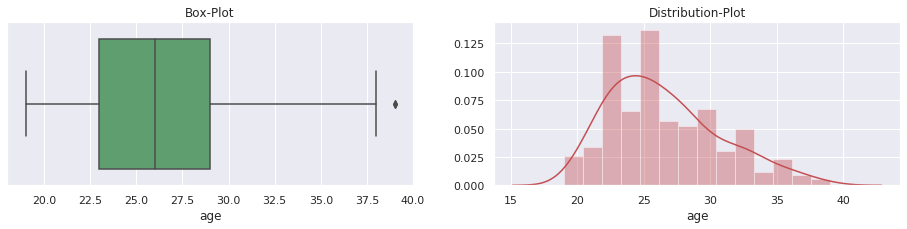

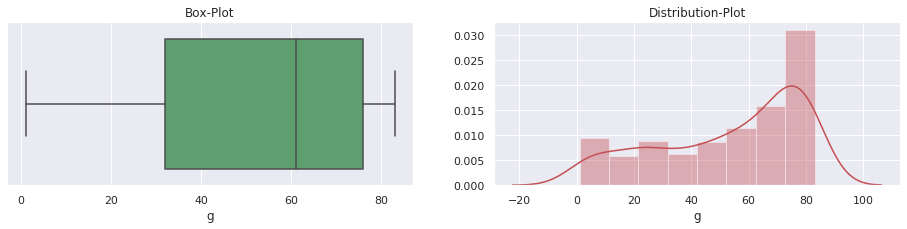

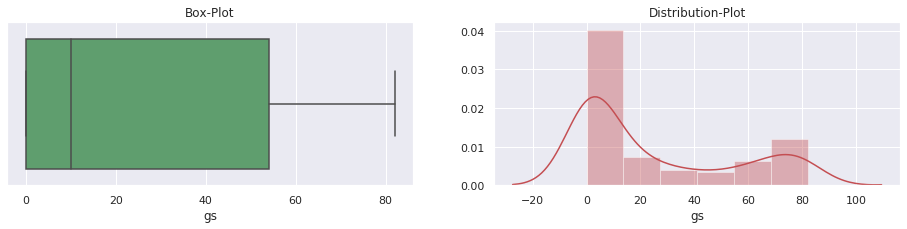

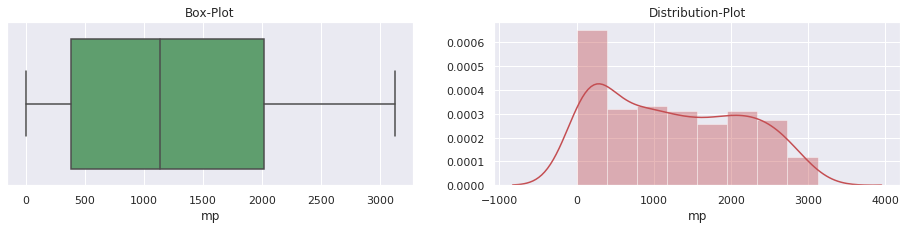

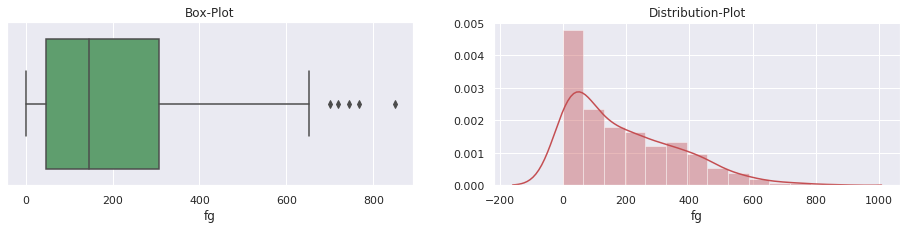

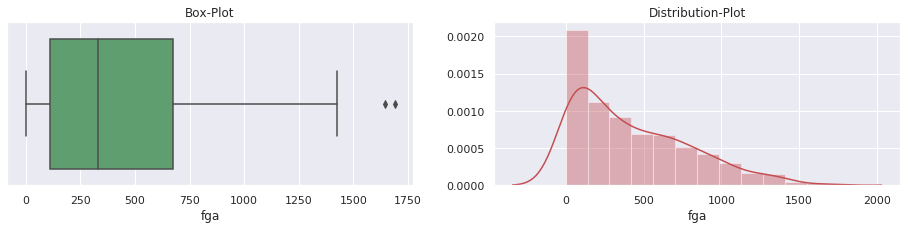

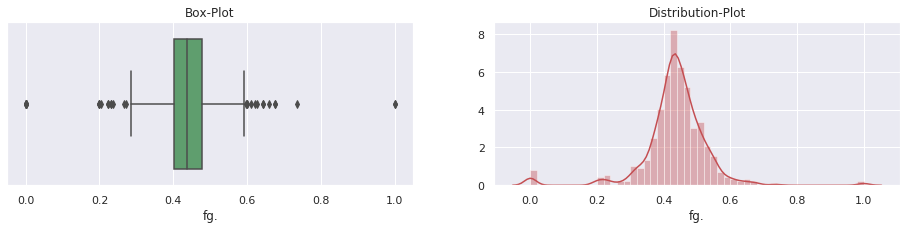

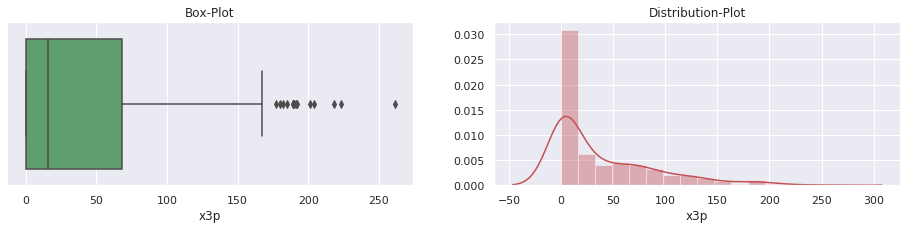

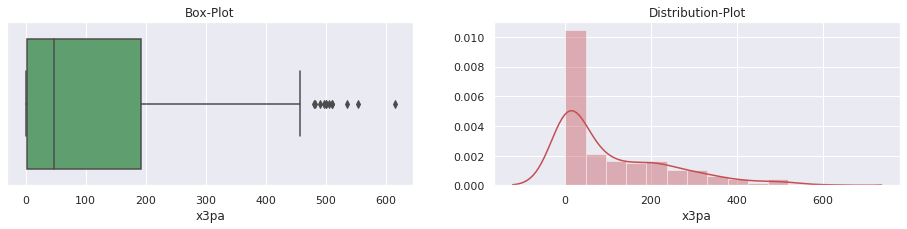

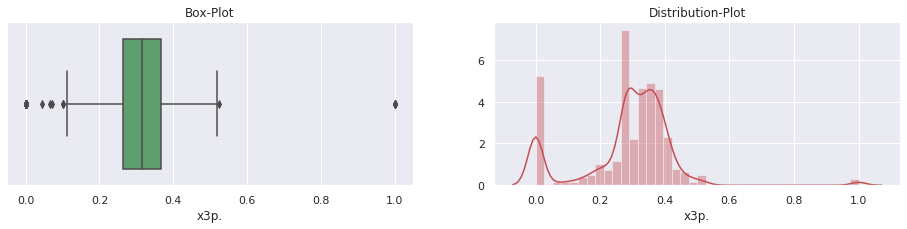

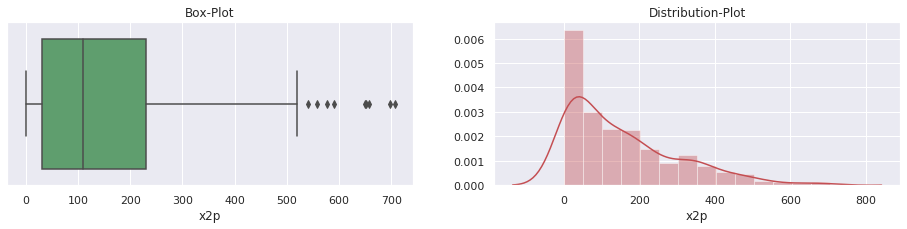

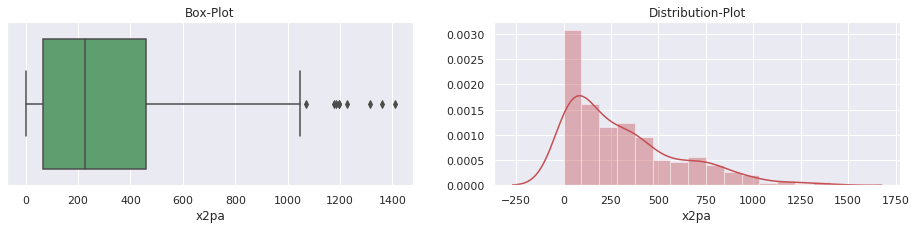

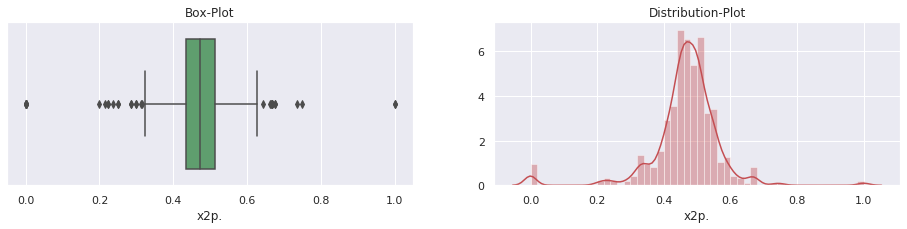

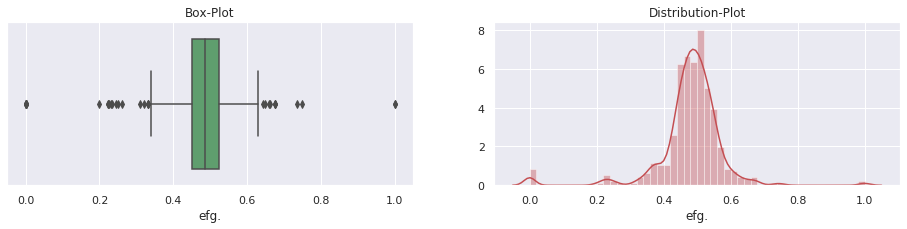

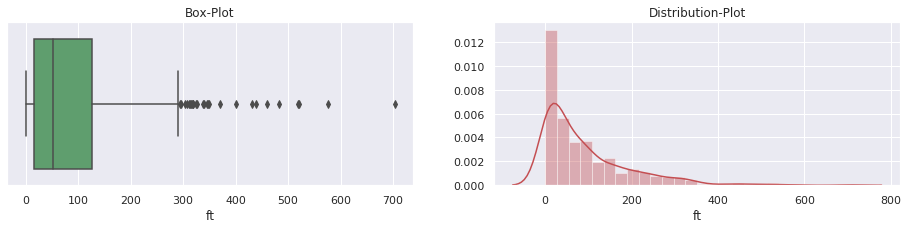

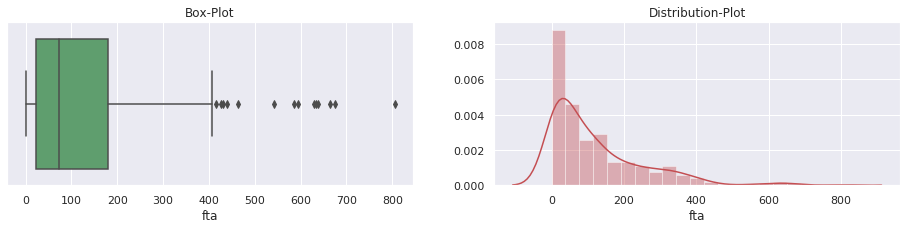

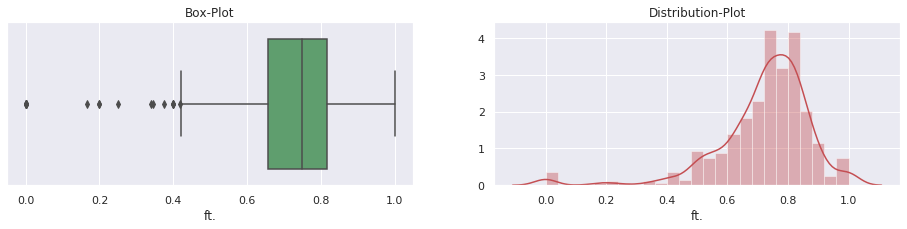

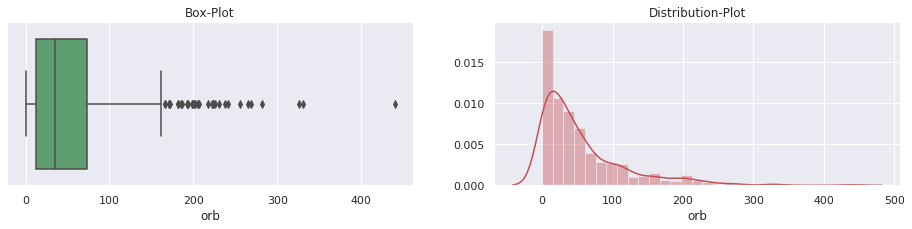

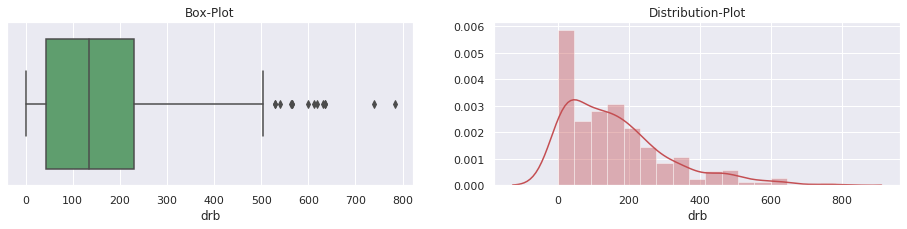

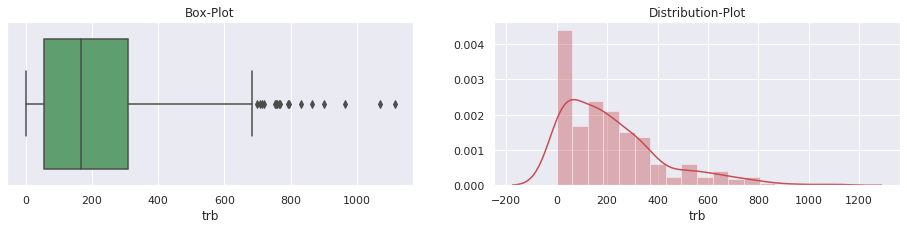

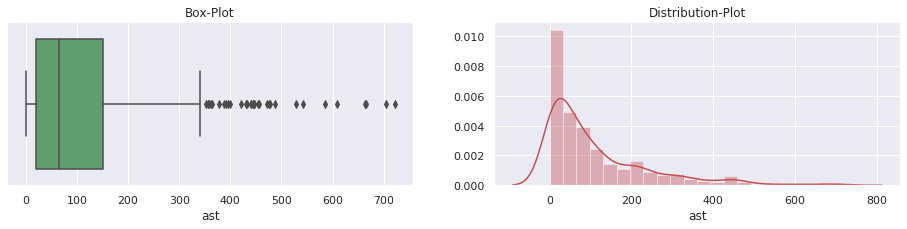

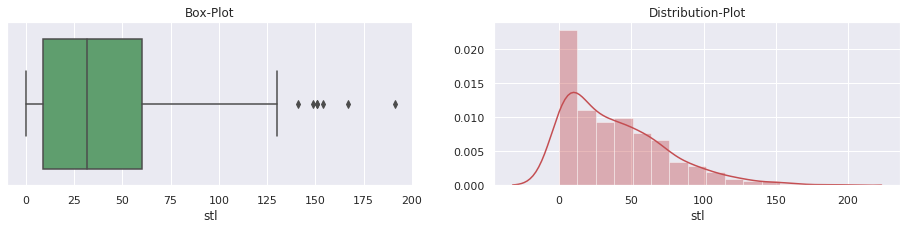

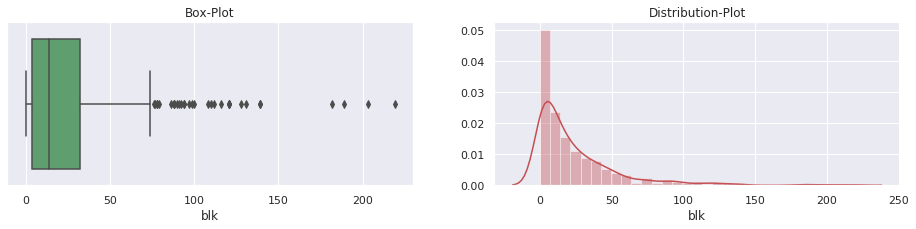

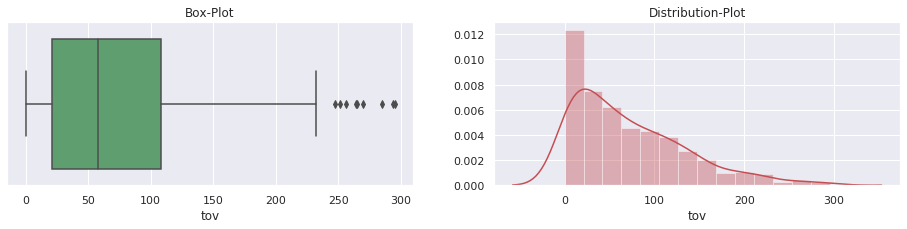

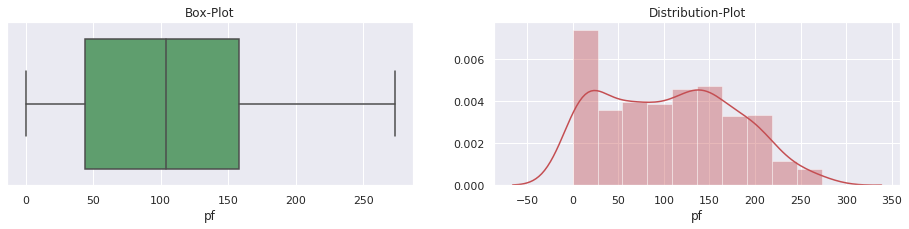

In [12]:
for i in nba_numeric.columns:
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,3))
    b = nba_numeric[i]
    sns.boxplot(b,ax=ax1,color='g')
    sns.distplot(b,color='r',ax=ax2)
    ax1.set_title("Box-Plot")
    ax2.set_title("Distribution-Plot")
    plt.show()

In [13]:
nba_category['bref_team_id'].unique()

array(['TOT', 'OKC', 'ORL', 'NOP', 'NYK', 'POR', 'MIA', 'MEM', 'BRK',
       'PHI', 'MIL', 'ATL', 'WAS', 'GSW', 'DEN', 'HOU', 'SAS', 'BOS',
       'PHO', 'MIN', 'LAC', 'CLE', 'UTA', 'DET', 'CHA', 'DAL', 'CHI',
       'LAL', 'IND', 'TOR', 'SAC'], dtype=object)

## Mapping of the Categorical Data

In [14]:
nba_category['bref_team_id'] = nba_category['bref_team_id'].map({'TOT':0,'OKC':1,'ORL':2,'NOP':3,'NYK':4,'POR':5,'MIA':6,'MEM':7,'BRK':8,'PHI':9,'MIL':10,'ATL':11,
        'WAS':12,'GSW':13,'DEN':14,'HOU':15,'SAS':16,'BOS':17,'PHO':18,'MIN':19,'LAC':20,'CLE':21,'UTA':22,
        'DET':23,'CHA':24,'DAL':25,'CHI':26,'LAL':27,'IND':28,'TOR':29,'SAC':30})

In [15]:
nba_category['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [16]:
nba_category['pos'] = nba_category['pos'].map({'SF':0,'C':1,'PF':2,'SG':3,'PG':4,'G':5,'F':6})

In [17]:
nba_category

,player,pos,bref_team_id,season_end
0,Quincy Acy,0,0,2013
1,Steven Adams,1,1,2013
2,Jeff Adrien,2,0,2013
3,Arron Afflalo,3,2,2013
4,Alexis Ajinca,1,3,2013
...,...,...,...,...
476,Tony Wroten,3,9,2013
477,Nick Young,3,27,2013
478,Thaddeus Young,2,9,2013
479,Cody Zeller,1,24,2013


## Concating the dataset as before

In [18]:
data = pd.concat([nba['pts'],nba_category,nba_numeric],axis=1)

In [19]:
data.shape

(481, 30)

In [20]:
del data['player']

In [21]:
data['season_end'].astype(int)
data.head(1)

,pts,pos,bref_team_id,season_end,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,171,0,0,2013,23,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.66,72,144,216,28,23,26,30,122


In [22]:
y = data['pts']
x = data.drop(['pts'],1)

In [23]:
del nba_numeric,nba_category

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) # Train-Test Split

In [25]:
knn = KNeighborsRegressor()

In [26]:
def Train_model(clf,X,y,rs = 0):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=rs)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = clf.score(x_test,y_test)
    print(f'Random_state:{rs} & accuracy:{round((accuracy*100),2)} %') 

In [27]:
for i in range(20):
    Train_model(knn,x,y,rs=i)

Random_state:0 & accuracy:97.34 %
Random_state:1 & accuracy:97.52 %
Random_state:2 & accuracy:98.1 %
Random_state:3 & accuracy:98.03 %
Random_state:4 & accuracy:97.16 %
Random_state:5 & accuracy:97.94 %
Random_state:6 & accuracy:97.12 %
Random_state:7 & accuracy:97.68 %
Random_state:8 & accuracy:97.48 %
Random_state:9 & accuracy:97.3 %
Random_state:10 & accuracy:97.14 %
Random_state:11 & accuracy:97.85 %
Random_state:12 & accuracy:98.1 %
Random_state:13 & accuracy:96.82 %
Random_state:14 & accuracy:97.44 %
Random_state:15 & accuracy:96.95 %
Random_state:16 & accuracy:96.17 %
Random_state:17 & accuracy:96.84 %
Random_state:18 & accuracy:97.67 %
Random_state:19 & accuracy:96.34 %


In [28]:
Train_model(knn,x,y,rs=2)

Random_state:2 & accuracy:98.1 %


## GridSearch CV

In [29]:
grid_param = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [30]:
grid = GridSearchCV(knn, grid_param,cv=5)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.30,random_state = 2)                                                    
grid.fit(x_train,y_train)
best_parameters = grid.best_params_
print(best_parameters)

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}


In [32]:
knn = KNeighborsRegressor(algorithm = 'ball_tree', leaf_size =18, n_neighbors =3)

In [33]:
for i in range(30):
    Train_model(knn,x,y,rs=i)

Random_state:0 & accuracy:97.23 %
Random_state:1 & accuracy:97.13 %
Random_state:2 & accuracy:98.06 %
Random_state:3 & accuracy:97.61 %
Random_state:4 & accuracy:96.99 %
Random_state:5 & accuracy:98.0 %
Random_state:6 & accuracy:97.36 %
Random_state:7 & accuracy:97.44 %
Random_state:8 & accuracy:97.44 %
Random_state:9 & accuracy:97.48 %
Random_state:10 & accuracy:97.11 %
Random_state:11 & accuracy:97.73 %
Random_state:12 & accuracy:97.63 %
Random_state:13 & accuracy:96.83 %
Random_state:14 & accuracy:97.52 %
Random_state:15 & accuracy:96.74 %
Random_state:16 & accuracy:96.76 %
Random_state:17 & accuracy:96.79 %
Random_state:18 & accuracy:97.43 %
Random_state:19 & accuracy:96.59 %
Random_state:20 & accuracy:97.7 %
Random_state:21 & accuracy:97.05 %
Random_state:22 & accuracy:97.66 %
Random_state:23 & accuracy:96.09 %
Random_state:24 & accuracy:97.75 %
Random_state:25 & accuracy:97.77 %
Random_state:26 & accuracy:96.62 %
Random_state:27 & accuracy:97.22 %
Random_state:28 & accuracy:97.5 

In [34]:
Train_model(knn,x,y,rs=2)

Random_state:2 & accuracy:98.06 %


## Cross Validation

In [35]:
from sklearn.model_selection import KFold

In [36]:
def CV_train(clf,x,y,n=2):
    kf = KFold(n_splits=n) 
    kf.get_n_splits(x) 

    accu = []
    for train_index, test_index in kf.split(x):
        xtrain, xtest = x.iloc[train_index], x.iloc[test_index]
        ytrain,ytest = y.iloc[train_index],y.iloc[test_index]
        clf.fit(xtrain,ytrain)
        pred = clf.predict(xtest)
        acc = clf.score(xtest,ytest)
        accu.append(acc)
    prediction = clf.predict(x)
    ac = clf.score(x,y)
    print(f"| CV: {n} | Mean Accuracy:{round(np.mean(accu)*100,2)}% | Over all Accuracy:{round(ac*100,2)}% |")
    return clf

In [37]:
for i in range(3,30):
    model=CV_train(knn,x,y,n=i)

| CV: 3 | Mean Accuracy:97.06% | Over all Accuracy:98.31% |
| CV: 4 | Mean Accuracy:97.1% | Over all Accuracy:98.35% |
| CV: 5 | Mean Accuracy:97.26% | Over all Accuracy:98.43% |
| CV: 6 | Mean Accuracy:97.29% | Over all Accuracy:98.43% |
| CV: 7 | Mean Accuracy:97.25% | Over all Accuracy:98.46% |
| CV: 8 | Mean Accuracy:97.28% | Over all Accuracy:98.47% |
| CV: 9 | Mean Accuracy:97.29% | Over all Accuracy:98.47% |
| CV: 10 | Mean Accuracy:97.38% | Over all Accuracy:98.51% |
| CV: 11 | Mean Accuracy:97.14% | Over all Accuracy:98.52% |
| CV: 12 | Mean Accuracy:97.19% | Over all Accuracy:98.52% |
| CV: 13 | Mean Accuracy:97.27% | Over all Accuracy:98.52% |
| CV: 14 | Mean Accuracy:97.39% | Over all Accuracy:98.52% |
| CV: 15 | Mean Accuracy:97.12% | Over all Accuracy:98.52% |
| CV: 16 | Mean Accuracy:97.2% | Over all Accuracy:98.54% |
| CV: 17 | Mean Accuracy:97.19% | Over all Accuracy:98.66% |
| CV: 18 | Mean Accuracy:97.22% | Over all Accuracy:98.66% |
| CV: 19 | Mean Accuracy:97.13% |

In [38]:
model = CV_train(knn,x_train,y_train,n=29)

| CV: 29 | Mean Accuracy:96.67% | Over all Accuracy:98.57% |


In [39]:
acu = knn.score(x_test ,y_test)
print("Test Accuracy from model->'knn' with CV:",round(acu*100,2),'%')

Test Accuracy from model->'knn' with CV: 97.86 %


In [40]:
test_pred = knn.predict(x_test)

In [41]:
lst = list(test_pred)

In [42]:
def Data(lst):
    lt = []
    for x in lst:
        lt.append(int(round(x)))
    return lt

In [43]:
lt = Data(lst)

## Prediction

In [44]:
def prediction(lt,index=0):
    try:
        if (index < len(lt)):
            print(f"Predicted Score is:{lt[index]}")
        else:
            print(f"put value between 0 to {len(x_test)} but you have entered:{index}")
    except:
        print("Value error..")

In [45]:
prediction(lt,index=1200)

put value between 0 to 145 but you have entered:1200


In [46]:
prediction(lt,index=130)

Predicted Score is:1259


In [47]:
prediction(lt,index=110)

Predicted Score is:1043


In [48]:
predf = pd.DataFrame({'Actual_Score':y_test.tolist(), 'Predicted_Score':test_pred.tolist()})
def pred(i=0):
    try:
        if (i <len(x_test)):
            return predf[predf.index==i]
        else:
            print(f"put value between 0 to {len(x_test)} but you have entered:{i}")  
    except:
        print("Value error..")
        

In [49]:
pred(i=1300)

put value between 0 to 145 but you have entered:1300


In [50]:
pred(i=130)

,Actual_Score,Predicted_Score
130,1131,1258.666667


In [51]:
pred(i=110)

,Actual_Score,Predicted_Score
110,1071,1042.666667


## -----------------------------------------------END-------------------------------------------------